In [1]:
#@title Mounting my Google Drive and Set TORCH_HOME env
from google.colab import drive
import os
drive.mount('/content/drive')

os.environ['TORCH_HOME'] = '/content/drive/My Drive/DL_Class/deep-learning-v2-pytorch/project-dog-classification/output_models/'


Mounted at /content/drive


Load Images and return counts

In [16]:
import numpy as np
from glob import glob
import cv2

# load filenames for dog images
dog_files_test = np.array(glob("/content/drive/My Drive/DL_Class/_dog_human_images/dogImages/test/*/*"))
dog_files_train = np.array(glob("/content/drive/My Drive/DL_Class/_dog_human_images/dogImages/train/*/*"))
dog_files_valid = np.array(glob("/content/drive/My Drive/DL_Class/_dog_human_images/dogImages/valid/*/*"))

# print number of images
print('There are %d total dog images.' % len(dog_files_test))
print('There are %d total dog images.' % len(dog_files_train))
print('There are %d total dog images.' % len(dog_files_valid))

There are 836 total dog images.
There are 6680 total dog images.
There are 835 total dog images.


Pull Random Set of Images for better visual analysisi

In [5]:
rando_doggo = np.random.choice(dog_files_test, size=8)
rando_doggo

array(['/content/drive/My Drive/DL_Class/_dog_human_images/dogImages/test/026.Black_russian_terrier/Black_russian_terrier_01849.jpg',
       '/content/drive/My Drive/DL_Class/_dog_human_images/dogImages/test/071.German_shepherd_dog/German_shepherd_dog_04955.jpg',
       '/content/drive/My Drive/DL_Class/_dog_human_images/dogImages/test/027.Bloodhound/Bloodhound_01900.jpg',
       '/content/drive/My Drive/DL_Class/_dog_human_images/dogImages/test/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03241.jpg',
       '/content/drive/My Drive/DL_Class/_dog_human_images/dogImages/test/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07658.jpg',
       '/content/drive/My Drive/DL_Class/_dog_human_images/dogImages/test/011.Australian_cattle_dog/Australian_cattle_dog_00728.jpg',
       '/content/drive/My Drive/DL_Class/_dog_human_images/dogImages/test/018.Beauceron/Beauceron_01303.jpg',
       '/content/drive/My Drive/DL_Class/_dog_human_images/dogImages/test/057.Dalmatian/Dalmatian_04030.jpg'],
     

Next two cells will visualize the selected images

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image


def img_reshape(img):
    img = Image.open(img).convert('RGB')
    img = np.asarray(img)
    return img

img_arr = []
for image in rando_doggo:
    img_arr.append(img_reshape(image))

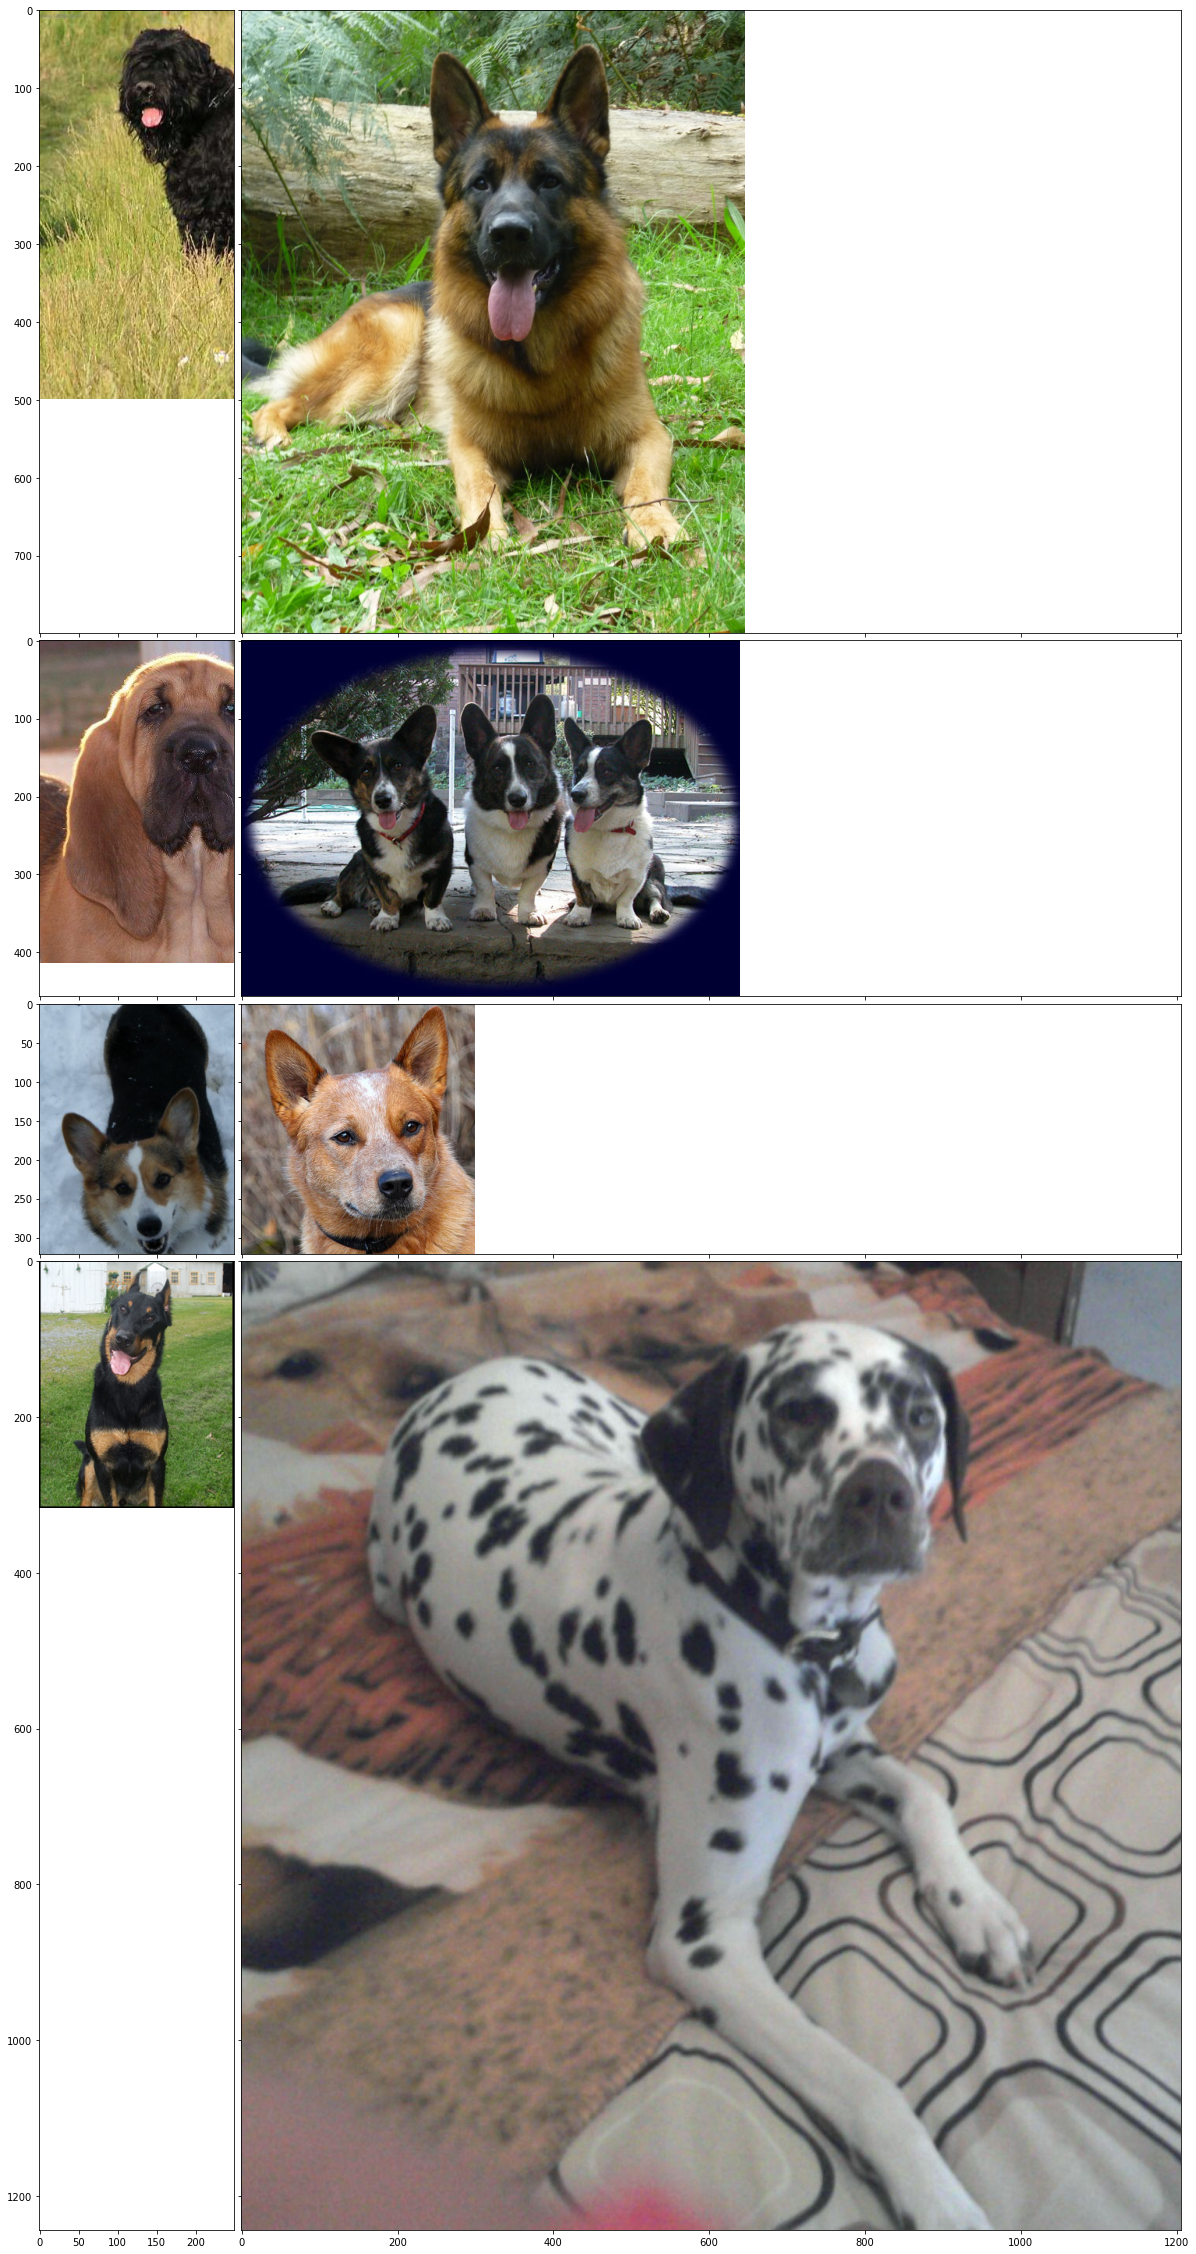

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(45., 45.))
grid = ImageGrid(fig, 
                 121,
                 nrows_ncols=(4, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes
                 )

for ax, im in zip(grid, img_arr):
    ax.imshow(im)

plt.show()

Inspect the size and channels of the images

In [14]:
imagesize = []
imageshape = []

In [17]:
for rds in rando_doggo:
  imgsize = Image.open(rds).convert('RGB')
  imagesize.append(imgsize.size)
  imgshape = cv2.imread(rds, cv2.IMREAD_UNCHANGED)
  imageshape.append(imgshape.shape[-1])


In [20]:
print(imagesize)
print(imageshape)

[(668, 500), (668, 500), (647, 800), (350, 414), (640, 457), (300, 349), (300, 321), (250, 318), (1206, 1244)]
[3, 3, 3, 3, 3, 3, 3, 3]
